In [1]:
#Shree Ganesha

In [2]:
# Supressing deprecation warnings
import warnings
warnings.filterwarnings(action='ignore')


# For analysis and numerical functions
import pandas as pd
import numpy as np


# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\Users\Kanhu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Kanhu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [3]:
#Reading the data
df=pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## EDA on input data

#### Checking data shape and size

In [5]:
df.shape

(730, 16)

In [6]:
### Checking the presence of missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dropping duplicates

In [9]:
df.drop_duplicates(keep=False, inplace=True)
df.shape

(730, 16)

#### As the shape remains the same even after dropping duplicates, hence no duplicates in the dataset.

### Identifying categorical and continous variables

In [10]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
### Dropping row index field :"instant" , dropping casual , registered and dteday as they are least significant for the predictions
df.drop(["instant","casual","registered","dteday"],axis=1,inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [12]:
#Checking new shape
df.shape

(730, 12)

### Updating column names and mapping categorical variables from data dictionary

### DATA Dictionary for reference:

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)
Readme.txt
Displaying Readme.txt.

In [13]:
### Renaming the fields
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [14]:
#Mapping weathersit column
df.weathersit=df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

#Mapping season column
df.season=df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

#Mapping month column
df.month=df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

#Mapping weekday column
df.weekday=df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

#Mapping year column
df.year=df.year.map({0:2018,1:2019})

In [15]:
## Verifying the cahnges
df.head(3)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


In [16]:
### Checking the latest shape
df.shape

(730, 12)

### Segregating categorical and continous variables

In [17]:
df.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,2018,jan,0,thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,2018,jan,0,fri,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,2018,jan,0,sat,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,2018,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,2018,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [18]:
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

In [19]:
cat_cols=["season","year","month","holiday","weekday","workingday","weathersit"]
cont_cols=["temp","atemp","humidity","windspeed"]
target=["cnt"]

In [20]:
## Ensuring no column is missed
print(len(cat_cols)+len(cont_cols)+len(target))

12


### Compute basic stats of dataset

In [21]:
df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### The above summary looks good and quite normal and gradual.

## Visualising the dataset

### Visualising overall dataset

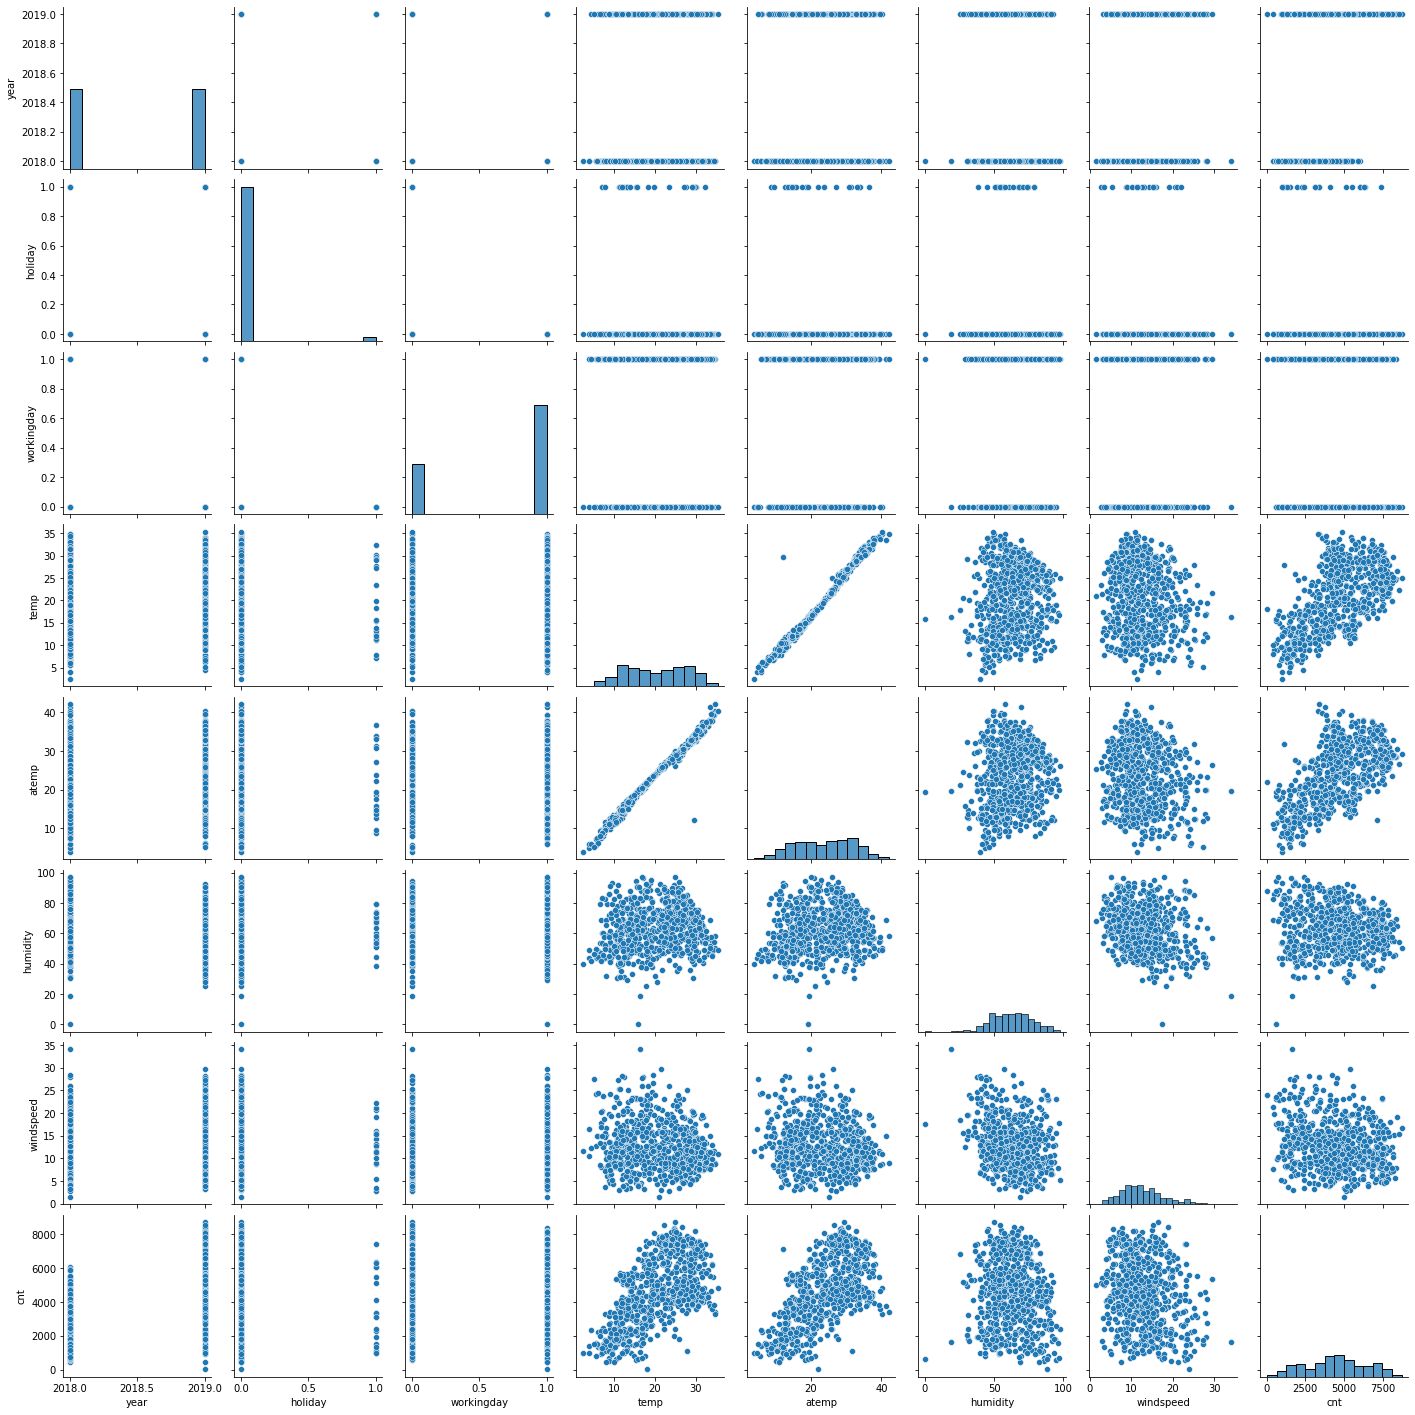

In [22]:
sns.pairplot(df)

### Visualising numeric/continous variables

##### Univariate analysis fot continous variables

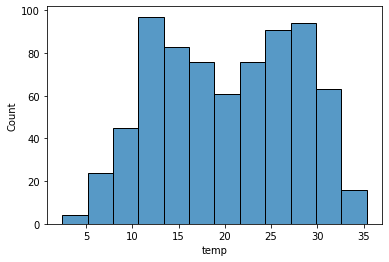

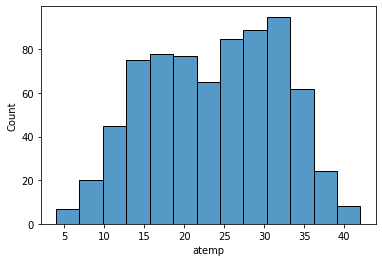

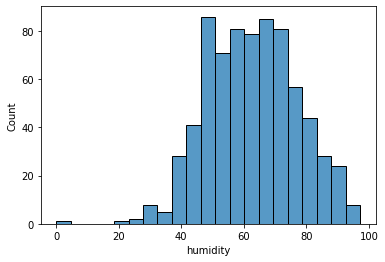

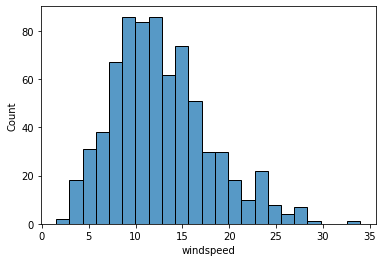

In [23]:
for i in cont_cols:
    sns.histplot(x=df[i])
    plt.show()

##### Bivariate analysis fot continous variables

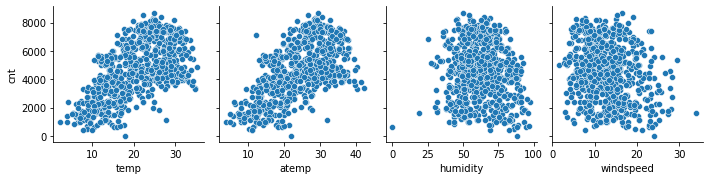

In [24]:
sns.pairplot(df,x_vars=df[cont_cols],y_vars=df[target])
plt.show()

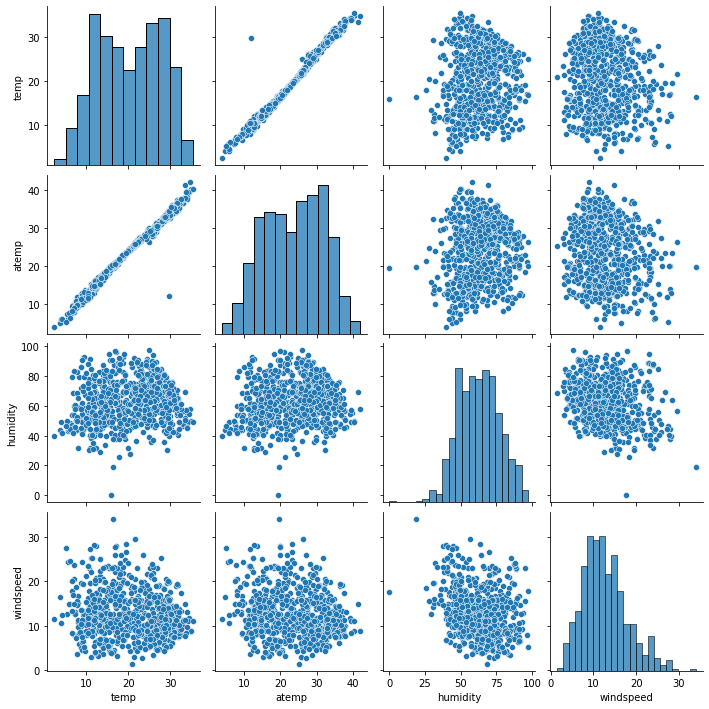

In [25]:
sns.pairplot(df[cont_cols])
plt.show()

### Visualising categorical variables

##### Univariate analysis of categorical columns

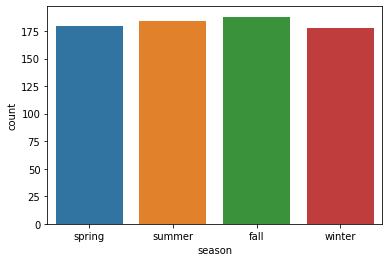

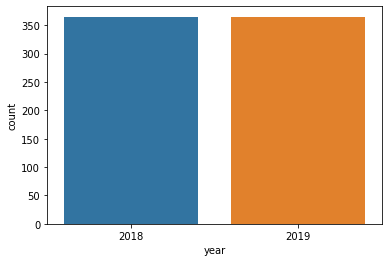

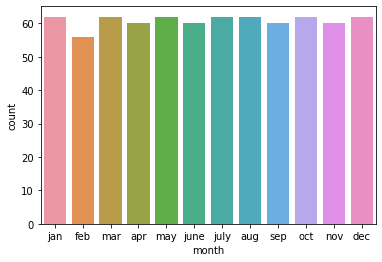

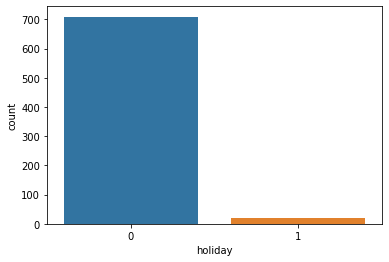

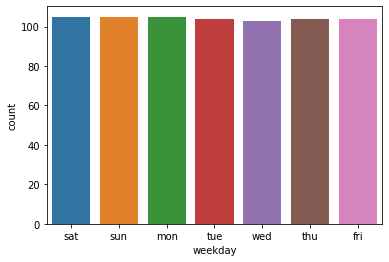

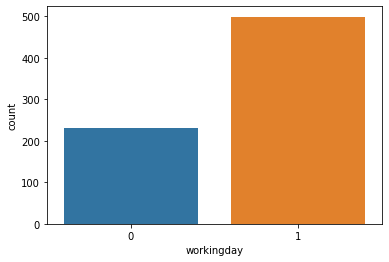

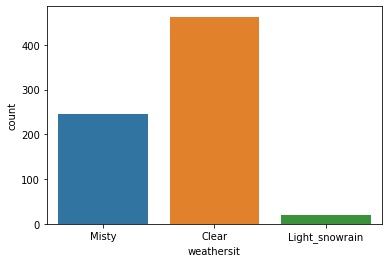

In [26]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

#### Bivariate analysis of categorical column

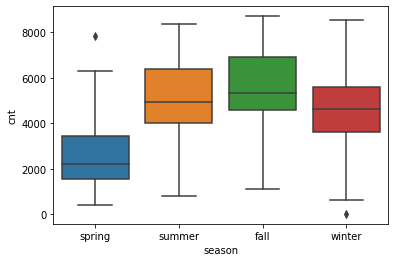

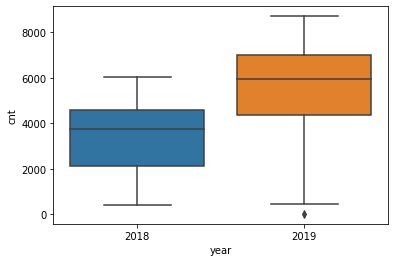

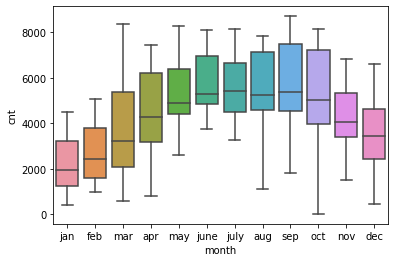

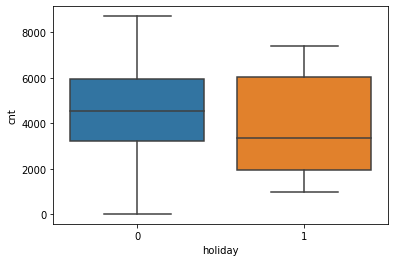

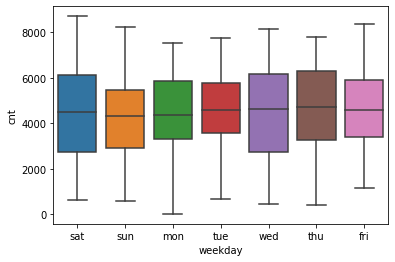

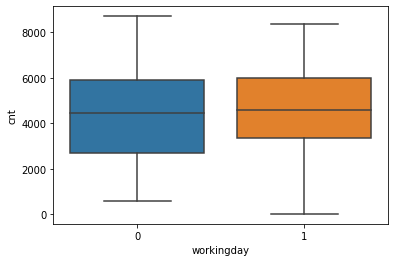

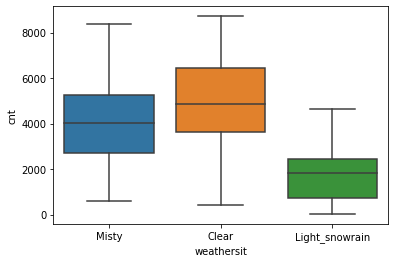

In [27]:
plt.figure(figsize=(6,4))
for i in cat_cols:
    sns.boxplot(x=df[i],y=df["cnt"])
    plt.show()

### Multivariate analysis

#### Generating correlation matrix and printing the heatmap

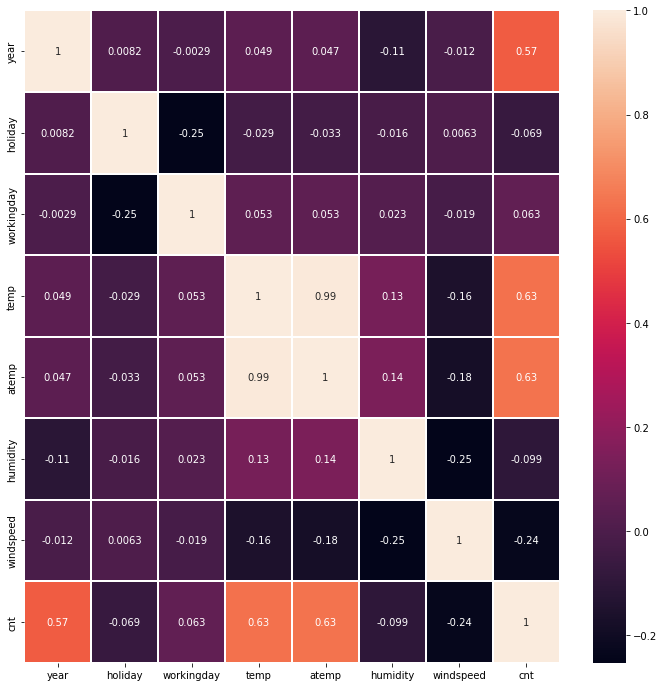

In [28]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot=True,linewidths=2)
plt.show()

#### As an observation from above heatmap, we can safely drop one field from atemp and temp, hence we will remove atemp from out dataset

In [29]:
df.drop("atemp",axis=1,inplace=True)
cont_cols.remove("atemp")

In [30]:
#Checking sample data
df.head(5)

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [31]:
## Checking the new shape
df.shape

(730, 11)

## Data Preparation

### Checking the values of categorical variables to create dummy variables

In [32]:
df[cat_cols].nunique()

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [33]:
## Dummy variable creation is required for categorical variables with value count>2
season_df=pd.get_dummies(df.season,drop_first=True)

month_df=pd.get_dummies(df.month,drop_first=True)

weekday_df=pd.get_dummies(df.weekday,drop_first=True)

weather_df=pd.get_dummies(df.weathersit,drop_first=True)

In [34]:
### Dropping the 4 Categorical variables from initial dataframe and merging the dummy df's
df_prep=pd.concat([df.drop(["season","month","weekday","weathersit"],axis=1),season_df,month_df,weekday_df,weather_df],axis=1)

In [35]:
df_prep.head(5)

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,2018,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
np.random.seed(0)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   spring          730 non-null    uint8  
 8   summer          730 non-null    uint8  
 9   winter          730 non-null    uint8  
 10  aug             730 non-null    uint8  
 11  dec             730 non-null    uint8  
 12  feb             730 non-null    uint8  
 13  jan             730 non-null    uint8  
 14  july            730 non-null    uint8  
 15  june            730 non-null    uint8  
 16  mar             730 non-null    uint8  
 17  may             730 non-null    uin

### Creating train-test split

In [37]:
X=df_prep.drop(["cnt"],axis=1)
y=df_prep[target]

In [38]:
### Casting all X columns to string type
X.columns = X.columns.astype(str)

In [39]:
### Performing train-test split with 80-20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [40]:
print("X_train.shape: ",X_train.shape,"X_train.shape: ",X_train.shape,"y_train.shape: ",y_train.shape,"y_test.shape: ",y_test.shape)

X_train.shape:  (584, 28) X_train.shape:  (584, 28) y_train.shape:  (584, 1) y_test.shape:  (146, 1)


#### Standardizing the data
##### Z= X-Xmean/Sigma

In [41]:
X_train=(X_train-X_train.mean())/X_train.std()

In [42]:
X_test=(X_test-X_test.mean())/X_test.std()

In [43]:
X_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,...,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02
mean,-5.590676e-14,2.806925e-16,-2.794568e-16,-3.350630e-16,1.897455e-15,-1.666760e-15,-5.703200e-18,4.638603e-17,-2.395344e-17,-8.973035e-17,...,-2.678603e-16,8.231619e-17,1.133986e-16,2.756547e-17,2.515111e-16,-1.127333e-16,1.634917e-16,1.952396e-16,1.048438e-16,5.094859e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.026903e+00,-1.676925e-01,-1.416639e+00,-2.384949e+00,-4.503570e+00,-1.900271e+00,-5.794898e-01,-5.715876e-01,-5.768558e-01,-3.156593e-01,...,-3.189237e-01,-2.955899e-01,-4.180318e-01,-4.208510e-01,-4.264672e-01,-3.951807e-01,-3.922834e-01,-4.264672e-01,-1.676925e-01,-7.210697e-01
25%,-1.026903e+00,-1.676925e-01,-1.416639e+00,-8.755902e-01,-7.880159e-01,-7.155013e-01,-5.794898e-01,-5.715876e-01,-5.768558e-01,-3.156593e-01,...,-3.189237e-01,-2.955899e-01,-4.180318e-01,-4.208510e-01,-4.264672e-01,-3.951807e-01,-3.922834e-01,-4.264672e-01,-1.676925e-01,-7.210697e-01
50%,9.721346e-01,-1.676925e-01,7.046873e-01,3.451280e-02,2.922729e-02,-1.469133e-01,-5.794898e-01,-5.715876e-01,-5.768558e-01,-3.156593e-01,...,-3.189237e-01,-2.955899e-01,-4.180318e-01,-4.208510e-01,-4.264672e-01,-3.951807e-01,-3.922834e-01,-4.264672e-01,-1.676925e-01,-7.210697e-01
75%,9.721346e-01,-1.676925e-01,7.046873e-01,8.835591e-01,7.132411e-01,5.410003e-01,1.722701e+00,-5.715876e-01,0.000000e+00,-3.156593e-01,...,-3.189237e-01,-2.955899e-01,-4.180318e-01,-4.208510e-01,-4.264672e-01,-3.951807e-01,-3.922834e-01,-4.264672e-01,-1.676925e-01,1.384454e+00
max,9.721346e-01,5.953084e+00,7.046873e-01,2.052872e+00,2.430347e+00,4.048062e+00,1.722701e+00,1.746518e+00,1.730567e+00,3.162548e+00,...,3.130177e+00,3.377272e+00,2.388067e+00,2.372069e+00,2.340831e+00,2.526155e+00,2.544813e+00,2.340831e+00,5.953084e+00,1.384454e+00


In [44]:
X_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,...,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,2.246909e-13,-1.247100e-16,6.615713e-17,6.539670e-17,-2.220446e-16,9.919945e-16,-9.125121e-18,2.889622e-17,1.216683e-16,-6.083414e-18,...,7.718331e-17,-2.037944e-16,6.843841e-18,7.794374e-17,-6.463627e-17,-1.680543e-16,-8.212609e-17,-1.551271e-16,-9.505334e-18,1.429602e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.927333e-01,-1.876649e-01,-1.710488e+00,-2.196719e+00,-2.392083e+00,-2.215995e+00,-5.385491e-01,-6.121878e-01,-5.279954e-01,-2.554280e-01,...,-2.399457e-01,-3.115684e-01,-3.737135e-01,-3.617739e-01,-3.372233e-01,-4.529861e-01,-4.638778e-01,-3.115684e-01,-1.876649e-01,-6.759063e-01
25%,-8.927333e-01,-1.876649e-01,-1.137710e+00,-8.842469e-01,-6.490062e-01,-7.365332e-01,-5.385491e-01,-6.121878e-01,-5.279954e-01,-2.554280e-01,...,-2.399457e-01,-3.115684e-01,-3.737135e-01,-3.617739e-01,-3.372233e-01,-4.529861e-01,-4.638778e-01,-3.115684e-01,-1.876649e-01,-6.759063e-01
50%,-8.927333e-01,-1.876649e-01,5.806243e-01,-3.929186e-02,-1.348006e-01,-5.413690e-02,-5.385491e-01,-6.121878e-01,-5.279954e-01,-2.554280e-01,...,-2.399457e-01,-3.115684e-01,-3.737135e-01,-3.617739e-01,-3.372233e-01,-4.529861e-01,-4.638778e-01,-3.115684e-01,-1.876649e-01,-6.759063e-01
75%,1.112483e+00,-1.876649e-01,5.806243e-01,9.758014e-01,6.052651e-01,5.995907e-01,-5.385491e-01,1.622298e+00,-5.279954e-01,-2.554280e-01,...,-2.399457e-01,-3.115684e-01,-3.737135e-01,-3.617739e-01,-3.372233e-01,-4.529861e-01,-4.638778e-01,-3.115684e-01,-1.876649e-01,1.469362e+00
max,1.112483e+00,5.292150e+00,5.806243e-01,1.742305e+00,2.342166e+00,3.006776e+00,1.844123e+00,1.622298e+00,1.880984e+00,3.888182e+00,...,4.139064e+00,3.187585e+00,2.657519e+00,2.745225e+00,2.945083e+00,2.192453e+00,2.140975e+00,3.187585e+00,5.292150e+00,1.469362e+00


### Model creation

#### Feature Selection

In [45]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=10)

selector=selector.fit(X_train,y_train)
selector.support_

C:\Users\Kanhu\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:157: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  support_ = np.ones(n_features, dtype=np.bool)
C:\Users\Kanhu\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guid

array([ True,  True,  True,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True])

In [46]:
selected_features=X_train.columns[selector.support_]

In [47]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

##### Adding the constant term in dataset which is missing if we use statsmodels library

In [48]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [49]:
X_train_sm.head()

,const,year,holiday,workingday,temp,summer,winter,sat,sun,Light_snowrain,Misty
367,1.0,0.972135,-0.167693,0.704687,-1.882464,-0.571588,-0.576856,-0.420851,-0.426467,-0.167693,-0.721070
648,1.0,0.972135,-0.167693,0.704687,-0.306487,-0.571588,1.730567,-0.420851,-0.426467,-0.167693,-0.721070
44,1.0,-1.026903,-0.167693,0.704687,-0.417082,-0.571588,-0.576856,-0.420851,-0.426467,-0.167693,-0.721070
705,1.0,0.972135,-0.167693,0.704687,-0.937801,-0.571588,1.730567,-0.420851,-0.426467,-0.167693,1.384454
379,1.0,0.972135,-0.167693,-1.416639,-1.790299,-0.571588,-0.576856,-0.420851,2.340831,-0.167693,-0.721070


##### Recursively fitting the model
###### Fit #1

In [50]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     281.1
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          7.54e-204
Time:                        00:46:56   Log-Likelihood:                -4762.1
No. Observations:                 584   AIC:                             9544.
Df Residuals:                     574   BIC:                             9588.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4504.3796     35.171    128.072      0.000    4435.301    4573.459
year             991.2338     35.364     28.030      0.000     921.776    1060.692
holiday        -2.478e+15   4.91e+15     -0.505      0.614   -1.21e+16    7.17e+15
workingday     -7.149e+15   1.42e+16     -0.505      0.614    -3.5e+16    2.07e+16
temp            1212.0118     36.582     33.132      0.000    1140.162    1283.862
summer           274.6606     37.688      7.288      0.000     200.638     348.684
winter           545.3902     37.967     14.365      0.000     470.820     619.960
sat             -5.43e+15   1.08e+16     -0.505      0.614   -2.66e+16    1.57e+16
sun             -5.48e+15   1.09e+16     -0.505      0.614   -2.68e+16    1.58e+16
Light_snowrain  -430.6002     35.736    -12.049      0.000    -500.790    -360.411
Misty           -303.3923     35.810     -8.472      0.000    -373.727    -233.057
==============================================================================
Omnibus:                       75.759   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.132
Skew:                          -0.697   Prob(JB):                     3.44e-39
Kurtosis:                       5.309   Cond. No.                     8.19e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### We will drop the fields : holiday,workingday,sat,sun as p-value is > 0.05

In [51]:
X_train_sm.drop(["holiday","workingday","sat","sun"],axis=1,inplace=True)
X_test_sm.drop(["holiday","workingday","sat","sun"],axis=1,inplace=True)

#### Fit #2

In [52]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     394.1
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.24e-200
Time:                        00:46:56   Log-Likelihood:                -4779.3
No. Observations:                 584   AIC:                             9573.
Df Residuals:                     577   BIC:                             9603.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4505.2671     36.082    124.862      0.000    4434.399    4576.135
year             988.1909     36.256     27.256      0.000     916.982    1059.400
temp            1224.1898     37.339     32.786      0.000    1150.853    1297.526
summer           282.0200     38.536      7.318      0.000     206.332     357.709
winter           544.2702     38.991     13.959      0.000     467.688     620.853
Light_snowrain  -415.8228     36.628    -11.352      0.000    -487.764    -343.882
Misty           -286.8001     36.624     -7.831      0.000    -358.732    -214.868
==============================================================================
Omnibus:                       68.361   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.843
Skew:                          -0.648   Prob(JB):                     6.47e-34
Kurtosis:                       5.145   Cond. No.                         1.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### p-value looks good for all features, proceeding to VIF check

#### VIF Checks

In [53]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,year,1.007917
2,temp,1.069041
3,summer,1.138717
4,winter,1.165772
5,Light_snowrain,1.028753
6,Misty,1.028499


#### * All features have VIF < 5

#### * We can cosider the above model as the final model as it seems to have very low multicolinearity b/w predictor variables and  p-values for all the features seems significant.
#### * Also, the F-Statistics value of 394.1 (>1) signifies that the overall model is significant
#### * The Durbin-Watson value is 1.992, which implies no autocorrelation 


In [54]:
### Checking the coefficients for all the features from the final model
res2.params

const             4505.267123
year               988.190900
temp              1224.189770
summer             282.020037
winter             544.270207
Light_snowrain    -415.822766
Misty             -286.800060
dtype: float64

In [55]:
X_train_sm.shape

(584, 7)

In [56]:
y_train_pred = res2.predict(X_train_sm)

In [57]:
##Computing R^2 value for the trained data
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8038446177895334

#### Calculated R^2 Values for the trained set is 0.8038 which is approximately equat to what we got from stats model(0.804), which signifies the model explains >80% variance 

In [58]:
#Converting y_train_pred to dataframe
y_train_pred_df=y_train_pred.to_frame()

### Validations against the assumptions of Linear Regression

#### Normality of error terms

Text(0.5, 0, 'Errors')

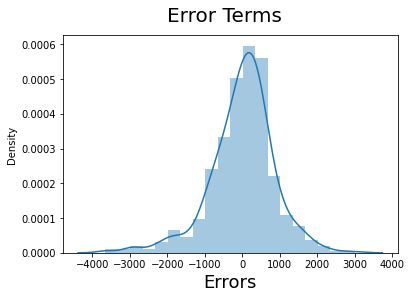

In [59]:
# Plot histogram of the error terms

fig = plt.figure()
sns.distplot((y_train["cnt"] - y_train_pred_df[0]), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### From the above histogram we can see the error terms are normally distributed and mean at 0

<AxesSubplot:>

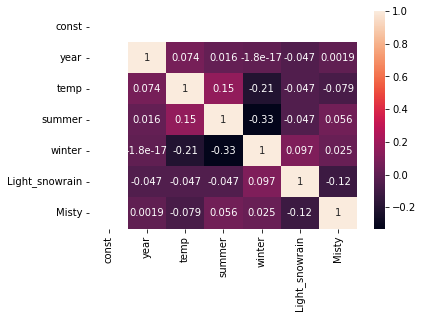

In [60]:
### Generating heatmap to verify there is no Multicollinearity
sns.heatmap(X_train_sm.corr(),annot=True)

##### There is no multicolinarity observed from the heatmap.


#### * Homoscedasticity

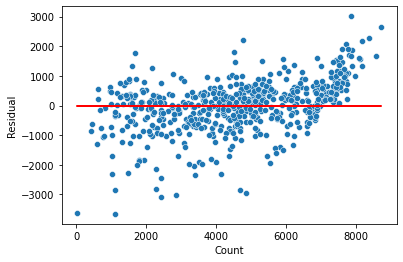

In [61]:
#y_train_pred = res1.predict(X_train_sm)            
residuals = (y_train["cnt"] - y_train_pred_df[0])
sns.scatterplot(x=y_train["cnt"],y=residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### * Linearity

In [62]:
#### Linear relationship validation using CCPR plot in statsmodels library
#### Listing params for the model  
res2.params

const             4505.267123
year               988.190900
temp              1224.189770
summer             282.020037
winter             544.270207
Light_snowrain    -415.822766
Misty             -286.800060
dtype: float64

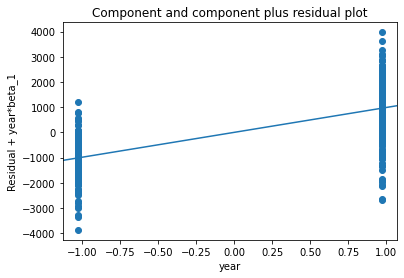

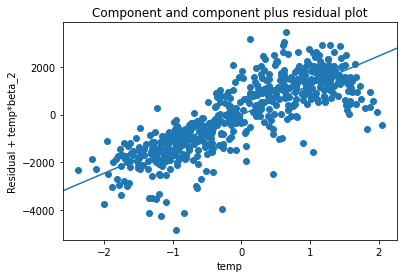

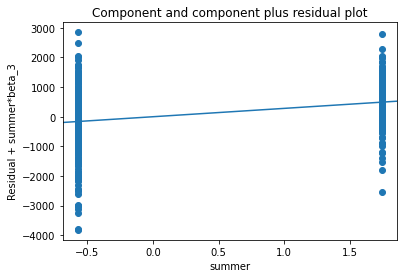

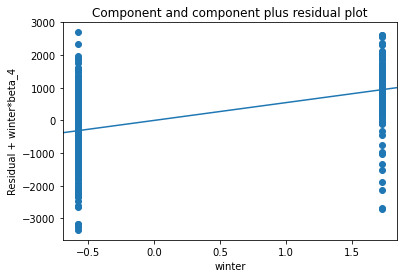

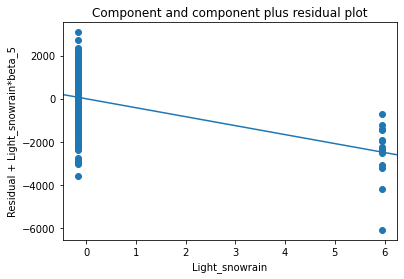

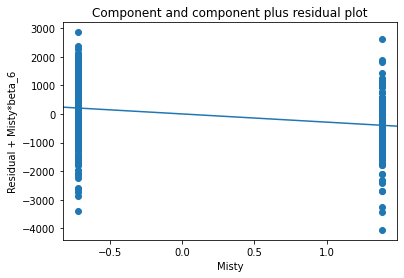

In [63]:
sm.graphics.plot_ccpr(res2, 'year')
plt.show()

sm.graphics.plot_ccpr(res2, 'temp')
plt.show()

sm.graphics.plot_ccpr(res2, 'summer')
plt.show()

sm.graphics.plot_ccpr(res2, 'winter')
plt.show()

sm.graphics.plot_ccpr(res2, 'Light_snowrain')
plt.show()

sm.graphics.plot_ccpr(res2, 'Misty')
plt.show()

##### Observation : Linearity can observed from the above CCPR graphs 

Text(0, 0.5, 'y_train_pred')

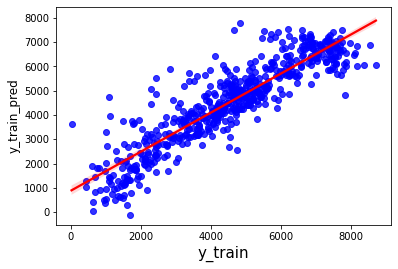

In [64]:
# Plotting regression line on training and predicted data
sns.regplot(x=y_train, y=y_train_pred_df, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_train', fontsize = 15)
plt.ylabel('y_train_pred', fontsize = 12) 

### As the assumptions of linear regression holds good with the model prepared, we will proceed to test the model with test data

### Predicting the values on the test dataset

In [65]:
y_pred = res2.predict(X_test_sm)

In [66]:
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.767862698833313


Text(0, 0.5, 'y_pred')

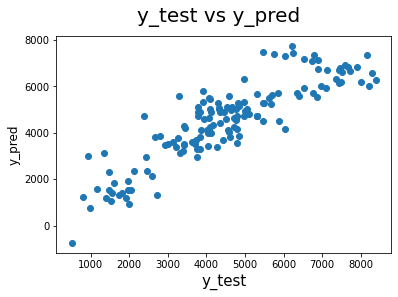

In [67]:
# Plotting test and predicted variables to check the data spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 12) 

<AxesSubplot:xlabel='cnt'>

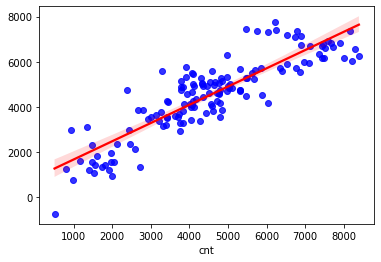

In [68]:
# Plotting regression line on test and predicted data
sns.regplot(x=y_test, y=y_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [69]:
# Calculating R^2 value for the train dataset

r2_train=r2_score(y_train, y_train_pred)
print(r2_train)

0.8038446177895334


In [70]:
# Calculating Adjusted-R^2 value for the train dataset

adjusted_r2_train = round(1-(1-r2_train)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1),4)
print(adjusted_r2_train)

0.7939


In [71]:
# Calculating R^2 value for the test dataset

r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.767862698833313


In [72]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2_test = round(1-(1-r2_test)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1),4)
print(adjusted_r2_test)

0.7561


### We are getting <5% difference in test and training dataset predictions, hence model is best fitted

In [73]:
print("R^2 Training: ",r2_train)
print("R^2 Test:     ",r2_test)
print("Adjusted R^2 Training : ",adjusted_r2_train)
print("AdjustedR^2 Test      : ",adjusted_r2_test)
print("( R^2 Training - R^2 Test ) % : ",(r2_train-r2_test)*100,"%")
print("( Adjusted R^2 Training - Adjusted R^2 Test ) % : ",(adjusted_r2_train-adjusted_r2_test)*100,"%")

R^2 Training:  0.8038446177895334
R^2 Test:      0.767862698833313
Adjusted R^2 Training :  0.7939
AdjustedR^2 Test      :  0.7561
( R^2 Training - R^2 Test ) % :  3.5981918956220382 %
( Adjusted R^2 Training - Adjusted R^2 Test ) % :  3.7800000000000056 %


### We conclude that the demand of bikes depend on year, temp, summer, winter, Light_snowrain and Misty features.